Laplace's equation in 2D is as follows:

$$ \frac{\delta ^2 p }{\delta x^2} \frac{\delta ^2 p}{\delta y^2} = 0$$


As this is similar to a diffusion equation, we discretise this with the central difference method:

$$ \frac{p_{i+1,j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i,j-1}^n}{\Delta y^2} = 0 $$


As there is no "Next time step", we can't solve this equation in the same manner as before. Instead, we iteratively solve to find an equilibrium point in the mesh.

The rearranged form of the equation is as follows:

$$ p_{i,j}^n = \frac{\Delta x^2 (p_{i,j+1} + p_{i,j-1}) + \Delta y^2 (p_{i+1,j} + p_{i-1,j})}{2(\Delta x^2 + \Delta y^2)}$$

Given boundary conditions for this used as follows:

p=0 at x=0

p=y at x=2

$\frac{\delta p}{\delta y} = 0$ at y=0, 1


With these conditions, the following analytical solution exists:

$$p(x,y) = \frac{x}{4} - 4 \sum_{n=1, odd}^{\infty} \frac{1}{(n\pi)^2 \sinh 2n\pi} \sinh n\pi x \cos n \pi y$$


In [1]:
#Importing packages

#Plotting library that is new to me
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Declare parameter variables

nx = 31 #Number of x points
ny = 31 #Number of y points
dx = 2 / (nx - 1) #Difference in x between x points
dy = 2 / (ny - 1) #Difference in y between y points

#Create grid
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny) # This is smaller for this for some reason

#Holds current grid conditions in a matrix
p = np.zeros((ny, nx))

#Place boundary conditions
p[:, 0] = 0
p[:, -1] = y
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

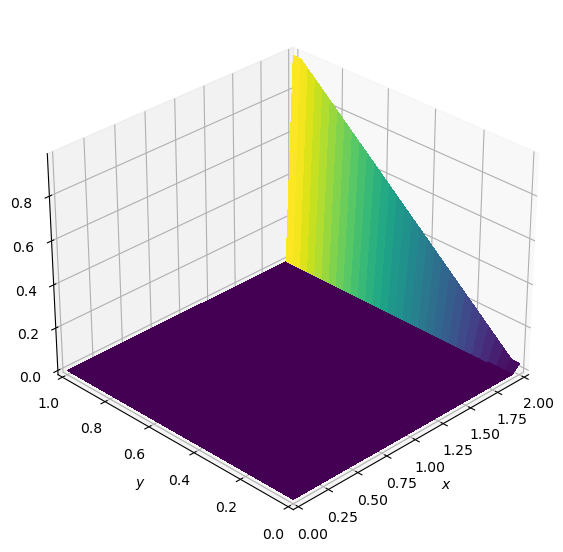

In [3]:
#Define plotting function
def plot2D(x, y, p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

#Plot initial conditions
plot2D(x,y,p)

In [4]:
#Define update function
def update(p, dx, dy, y, l1norm_target = 0.0001):
    l1norm = 1
    
    
    #While still changing significantly
    while l1norm > l1norm_target:
        pnext = p.copy()
    
        #Update equation
        pnext[1:-1, 1:-1] = (dx**2 * (p[2:, 1:-1] + p[0:-2, 1:-1]) + 
                             dy**2 * (p[1:-1, 2:] + p[1:-1, 0:-2])) / (2*(dx*dx + dy*dy))
                         
        #Update boundary conditions
        pnext[:, 0] = 0
        pnext[-1, :] = y
        pnext[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        pnext[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        
        #Difference term to be used
        l1norm = (np.sum(np.abs(pnext[:]) - np.abs(p[:])) /
                np.sum(np.abs(p[:])))
        
        
        p = pnext.copy()
    
    
    return p

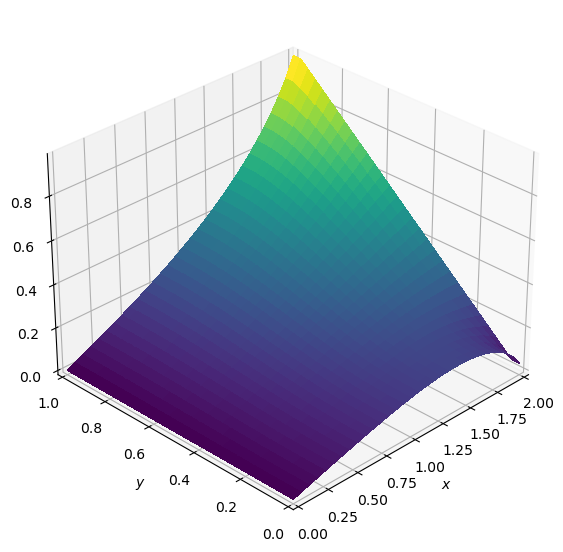

In [5]:
p = update(p, dx, dy, y)

    
plot2D(x, y, p)

In [6]:
1e-4

0.0001